In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### TPC-H

In [2]:
# Base directory containing the results
base_dir = "results_tpch"  # Replace with the path to your "results" folder

# List to store the data for the DataFrame
data = []

# Walk through the base directory
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file == "execution_times.txt":
            # Extract query number and scaling factor (SF) from the directory structure
            path_parts = root.split(os.sep)
            sf = path_parts[-2]  # SF folder (e.g., SF_1)
            query_number = path_parts[-1]  # Query folder (e.g., query_1, query_5, query_18)
            
            # Full path to the execution times file
            file_path = os.path.join(root, file)
            
            # Read the execution times from the file
            with open(file_path, 'r') as f:
                execution_times = f.readlines()
            
            # Add each execution time with associated metadata to the data list
            for time in execution_times:
                data.append({
                    "Execution Time": float(time.strip()),
                    "Query Number": query_number,
                    "Scaling Factor (SF)": sf
                })

# Create the DataFrame
df = pd.DataFrame(data)

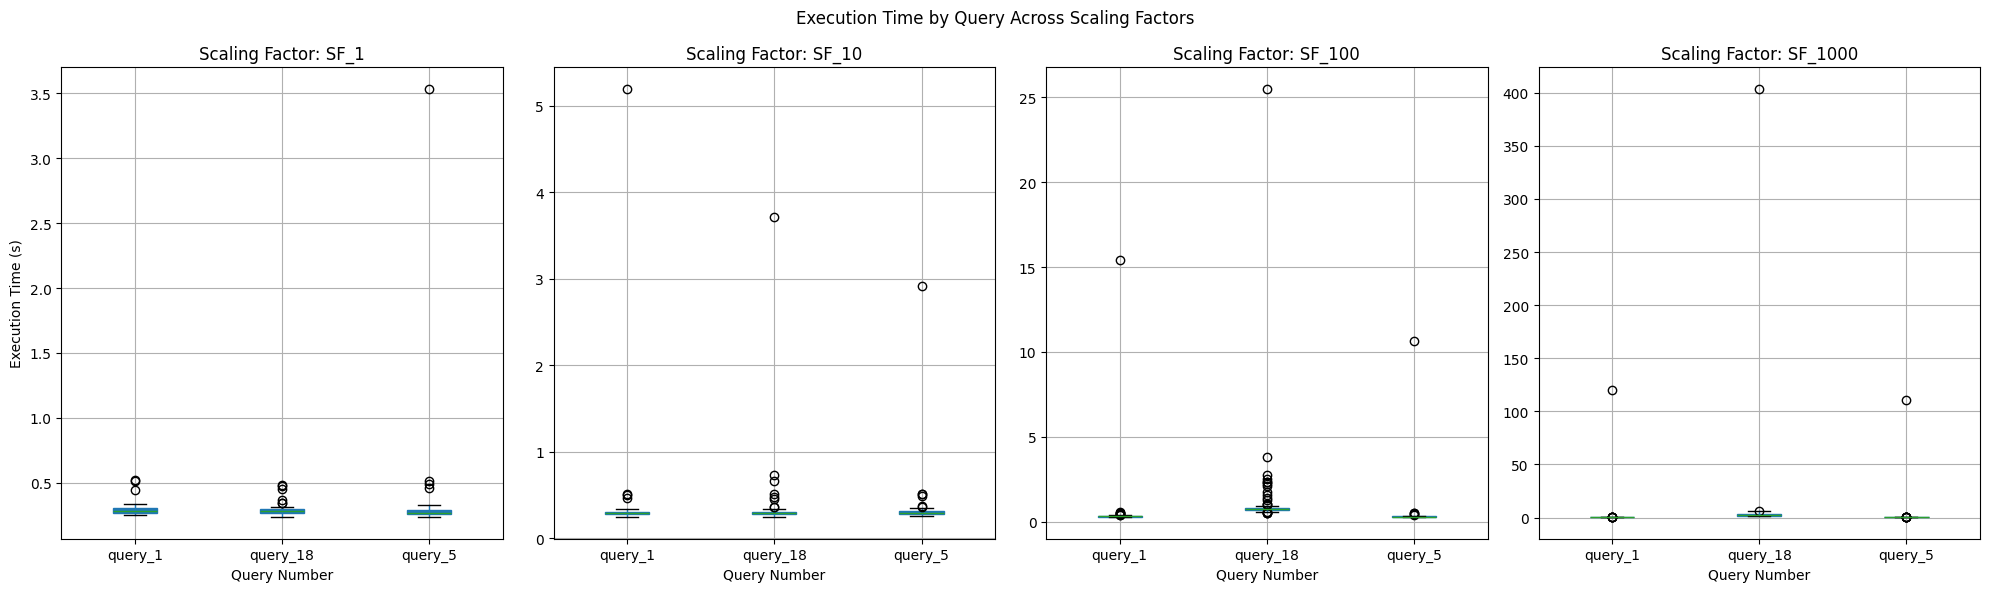

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=False, constrained_layout=False)
sfls = ['SF_1', 'SF_10', 'SF_100', 'SF_1000']

# Looping through scaling factors
for col, sf in enumerate(sfls):  # Add col to enumerate the correct axis
    ax = axes[col]
    subset = df[df["Scaling Factor (SF)"] == sf]
    if not subset.empty:
        subset.boxplot(
            by="Query Number",
            column="Execution Time",
            ax=ax,
            grid=True,
            patch_artist=True
        )
    ax.set_title(f"Scaling Factor: {sf}")
    ax.set_ylabel("Execution Time (s)" if col == 0 else "")


plt.suptitle("Execution Time by Query Across Scaling Factors")
plt.tight_layout() 
plt.show()


### Implementations

In [4]:
python_results = pd.read_csv(
    'implementations/results/Python/execution_times.txt', 
    names=['execution_time'], 
    header=None  # Indicates the file doesn't have a header row
)

In [5]:
sql_results = pd.read_csv(
    'implementations/results/SQL/execution_times.txt', 
    names=['execution_time'], 
    header=None  # Indicates the file doesn't have a header row
)

In [6]:
sql_queries_results = pd.read_json(
    'implementations/results/SQL/per_query_times.json', 
)

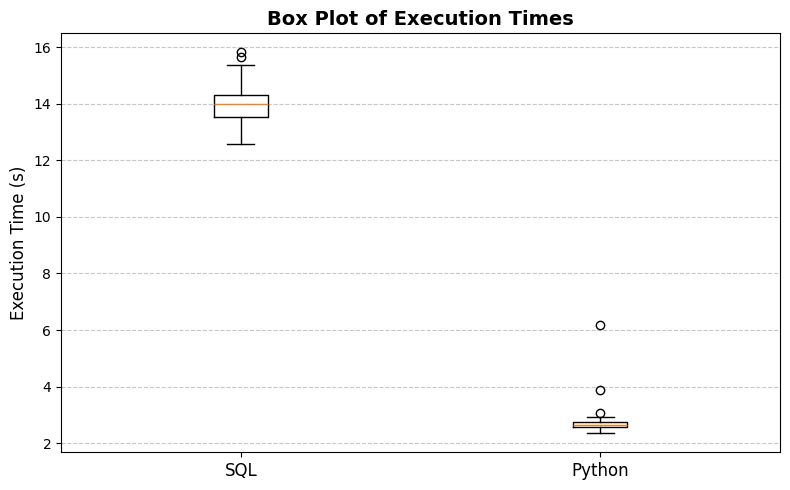

In [7]:
# Combine the data for plotting
data = [sql_results['execution_time'], python_results['execution_time']]

# Create the box plot
plt.figure(figsize=(8, 5))
plt.boxplot(data)

# Customize the plot
plt.xticks([1, 2], ['SQL', 'Python'], fontsize=12)
plt.title('Box Plot of Execution Times', fontsize=14, fontweight='bold')
plt.ylabel('Execution Time (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

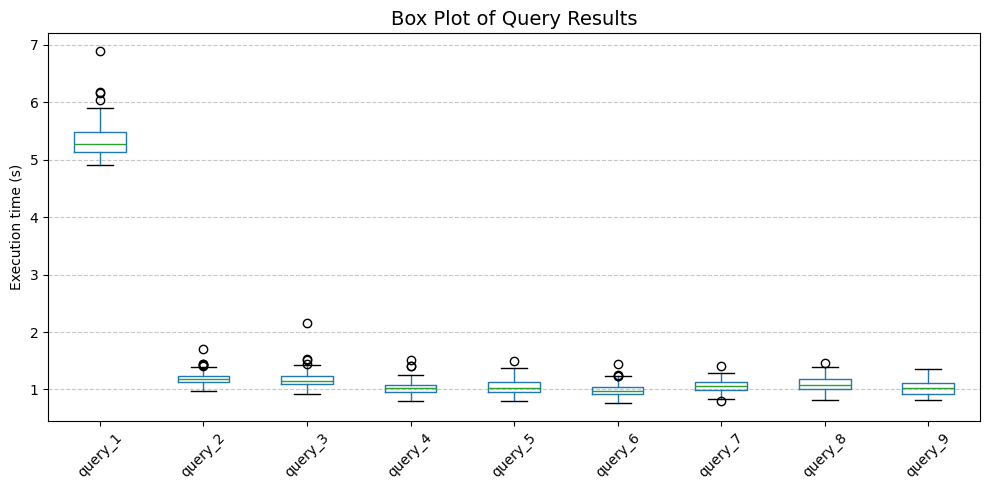

In [8]:
# Create the box plot
plt.figure(figsize=(10, 5))
sql_queries_results.boxplot(grid=False)

# Customize the plot
plt.title('Box Plot of Query Results', fontsize=14)
plt.ylabel('Execution time (s)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
